In [ ]:
from pathlib import Path
import sys, os
import datetime as dt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
PROJPATH = Path().resolve().parent
sys.path.append((PROJPATH / 'scripts').as_posix())
import riverice_util as ru

In [ ]:
PROJPATH

PosixPath('/Users/christine/Projects/2023_Riverice')

In [ ]:
username = os.environ['USER']
username

'christine'

In [ ]:
prefix = "DD25"       # set to TDD for Thawing Degree Days

tdd_anomalycorr = f"/Users/{username}/Projects/2023_Riverice/data/breakupdata/derived/{prefix}_anomaly_correlations.csv"
breakup_stats = f"/Users/{username}/Projects/2023_Riverice/data/breakupdata/derived/breakupdate_mean_std_1983_2022.csv"
breakupdata = Path(f'/Users/{username}/Projects/2023_Riverice/data/breakupdata/')
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
combinedpath = Path('/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS_combined_DD')
outfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/working")

Rename station names

In [ ]:
anomalycorrDF = pd.read_csv(tdd_anomalycorr, header=3, index_col=0)
anomalycorrDF

,date,stationname,location,r2,r,p,DateStamp
0,04-01,ALYESKA,Koyukuk River at Bettles,0.006324,0.079526,0.635067,2000-04-01
1,04-01,ANCHORAGE_MERRILL_FIELD,Koyukuk River at Bettles,0.000352,-0.018763,0.929067,2000-04-01
2,04-01,ANCHORAGE_TED_STEVENS_INTL_AP,Koyukuk River at Bettles,0.004262,0.065284,0.685092,2000-04-01
3,04-01,AUKE_BAY,Koyukuk River at Bettles,0.005658,0.075220,0.644580,2000-04-01
4,04-01,BARROW_AP,Koyukuk River at Bettles,0.009983,0.099915,0.534245,2000-04-01
...,...,...,...,...,...,...,...
98600,06-04,SITKA_AP,Gakona River at Gakona,0.115278,-0.339527,0.049471,2000-06-04
98601,06-04,SKAGWAY_AP,Gakona River at Gakona,0.065209,-0.255361,0.208012,2000-06-04
98602,06-04,TALKEETNA_AP,Gakona River at Gakona,0.324413,-0.569573,0.000438,2000-06-04
98603,06-04,TANANA_AP,Gakona River at Gakona,0.093829,-0.306316,0.082962,2000-06-04


In [ ]:
locations = sorted(anomalycorrDF.location.unique())
len(locations)

41

## Likelihoods for Eagle , etc. 

In [ ]:
location = "Chena River at Fairbanks"
try:
    location_short = location.split('nr')[1].strip()
except IndexError: 
    location_short = location.split('at')[1].strip()
location_short

'Fairbanks'

In [ ]:
mean_station = pd.read_csv(combinedpath / f"{prefix}_combined_{location.replace(' ', '_')}.csv", 
            skiprows=3, index_col=0)
mean_station

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,3.75,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.00,6.25,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2,0.00,6.50,0.00,0.00,0.00,0.00,0.00,0.00,17.25,0.00,...,0.33,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
3,0.00,6.50,0.00,0.00,2.67,0.00,0.00,0.00,20.00,0.00,...,3.33,0.00,0.00,0.00,0.00,0.00,0.00,4.33,0.00,0.0
4,0.00,6.50,0.00,0.00,3.83,0.00,0.00,0.00,21.00,0.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,4.33,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2094.25,2087.00,1631.75,1976.75,1786.16,1536.00,1690.25,1988.75,2116.75,1910.50,...,2263.50,2273.67,2008.17,1810.95,2394.50,2029.33,1996.63,1847.21,1755.25,NaN
118,2131.75,2113.50,1677.75,2019.00,1821.49,1569.50,1730.25,2023.50,2149.75,1944.50,...,2294.33,2309.00,2046.33,1847.45,2434.67,2063.50,2034.63,1888.38,1792.75,NaN
119,2165.50,2139.25,1722.50,2058.00,1857.16,1604.25,1773.50,2062.00,2186.50,1979.75,...,2328.17,2346.83,2086.50,1883.95,2480.83,2097.17,2070.30,1927.71,1833.00,NaN


In [ ]:
def datestr2dayssince(datestr, since='0301'):
    thedate = dt.datetime.strptime(datestr, '%Y-%m-%d').date()
    since_mth = int(since[:2])
    since_day = int(since[3:])
    since_date = dt.date(thedate.year, since_mth, since_day)
    return (thedate - since_date).days
def dayssince2date(days, year=2000, since='0301'):
    since_date = dt.datetime.strptime(f"{year}{since}", "%Y%m%d").date()
    return (since_date + dt.timedelta(days=days)).strftime("%m-%d")

In [ ]:
breakuppth = breakupdata / "derived/breakupDate_cleaned.csv"
breakup = pd.read_csv(breakuppth, header=3, index_col=0)
breakup = breakup[breakup.siteID == location].sort_values(by='year').reset_index(drop=True)
breakup['days_since_march1'] = breakup.apply(lambda row: ru.datestr2dayssince(row.breakup), axis=1)
breakup

,id,siteID,year,breakup,JulianDay,days_since_march1
0,6856,Chena River at Fairbanks,1959,2017-05-01,121,61
1,4442,Chena River at Fairbanks,1983,1983-04-28,118,58
2,3844,Chena River at Fairbanks,1985,1985-05-08,128,68
3,3845,Chena River at Fairbanks,1986,1986-05-08,128,68
4,3846,Chena River at Fairbanks,1988,1988-04-25,116,55
5,3847,Chena River at Fairbanks,1989,1989-04-29,119,59
6,3848,Chena River at Fairbanks,1990,1990-04-19,109,49
7,3849,Chena River at Fairbanks,1991,1991-04-21,111,51
8,3850,Chena River at Fairbanks,1993,1993-03-31,90,30
9,3851,Chena River at Fairbanks,1995,1995-04-22,112,52


In [ ]:
breakup_avg_model = linear_model.LinearRegression() 
breakup_avg_model.fit(breakup[['year']], breakup[['days_since_march1']])

LinearRegression()

In [ ]:
mu_0 = breakup_avg_model.predict([[2024]]).item()

start = 0 
xs = np.arange(0, 101)

/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
mu_0

56.000432245515455

In [ ]:
sigma_0 = mean_squared_error([breakup_avg_model.predict([[yr]]).item() for yr in breakup['year'].tolist()],
                   breakup['days_since_march1'].tolist(), squared=False)

/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fit

In [ ]:
import scipy.stats as stats
import math

In [ ]:
sns.set_style('whitegrid')

(0.0, 70.0)

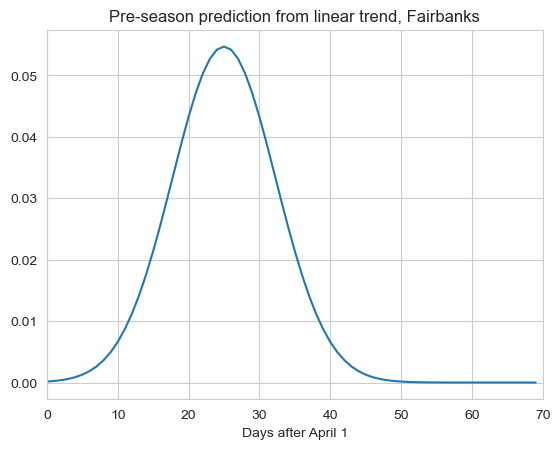

In [ ]:
plt.plot(xs-31, stats.norm.pdf(xs, mu_0, sigma_0))
plt.title(f"Pre-season prediction from linear trend, {location_short}")
plt.xlabel("Days after April 1")
plt.xlim((0,70))

In [ ]:
breakup

,id,siteID,year,breakup,JulianDay,days_since_march1
0,6856,Chena River at Fairbanks,1959,2017-05-01,121,61
1,4442,Chena River at Fairbanks,1983,1983-04-28,118,58
2,3844,Chena River at Fairbanks,1985,1985-05-08,128,68
3,3845,Chena River at Fairbanks,1986,1986-05-08,128,68
4,3846,Chena River at Fairbanks,1988,1988-04-25,116,55
5,3847,Chena River at Fairbanks,1989,1989-04-29,119,59
6,3848,Chena River at Fairbanks,1990,1990-04-19,109,49
7,3849,Chena River at Fairbanks,1991,1991-04-21,111,51
8,3850,Chena River at Fairbanks,1993,1993-03-31,90,30
9,3851,Chena River at Fairbanks,1995,1995-04-22,112,52


In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(20, 80):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            print(days_after_march_1, days_possible, mean_station[years].mean(axis=1)[days_after_march_1])
            records.append(
                {'forecast_day_past_march1': days_after_march_1,
                    'days_from_then': days,
                    'mean_DD': mean_station[years].mean(axis=1)[days_after_march_1]}
            )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF

20 30 5.5
20 49 6.5
20 50 62.0
20 51 11.585
20 52 7.21
20 53 0.0
20 54 11.776666666666666
20 55 29.64
20 57 17.526666666666667
20 58 0.75
20 59 11.5
20 60 2.9166666666666665


KeyError: "['1959'] not in index"

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(20, 90):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            for year in years:
                # print(year, days_after_march_1, mean_eagle[year][days_after_march_1])
                records.append({
                    'forecast_day_past_march1': days_after_march_1,
                    'year': year,
                    'days_from_then': days,
                    'mean_DD': mean_station[year][days_after_march_1]}
                )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF['day_absolute_since_march_1'] = likelihoodDF['forecast_day_past_march1'] + likelihoodDF['days_from_then']
likelihoodDF['forecastdate'] = likelihoodDF['forecast_day_past_march1'].apply(dayssince2date)
likelihoodDF

KeyError: '1959'

In [ ]:
mean_station.loc[ii-1]

1980     73.33
1981     66.00
1982     21.33
1983     12.83
1984     67.88
1985      4.50
1986      2.00
1987     45.17
1988     18.67
1989      0.83
1990     44.67
1991      4.50
1992     31.12
1993     41.33
1994     47.50
1995     32.38
1996     22.33
1997      7.17
1998     74.83
1999     28.38
2000     21.12
2001     18.88
2002     15.00
2003     12.33
2004     10.50
2005     26.12
2006      4.12
2007      8.75
2008     52.75
2009      3.00
2010      6.43
2011     13.12
2012      5.00
2013      8.50
2014     16.75
2015     40.88
2016     56.50
2017     22.62
2018     11.12
2019    187.00
2020     45.75
2021      3.88
2022     12.50
2023     15.00
2024     49.50
Name: 35, dtype: float64

43.55454546426997 44.0 7.822348017829845 2.8555490065708823e-08 1.0301008508832756e-06 5.926949269841322e-05 0.0015322699356118627


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_70568/2376272638.py:62: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


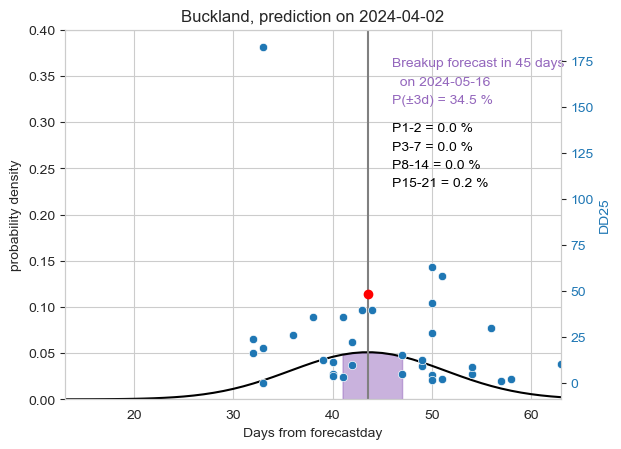

42.710318029006565 43.0 7.8414213984095715 5.489922082398312e-08 1.8375170804514462e-06 9.472544361509947e-05 0.002199277656047207


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_70568/2376272638.py:62: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


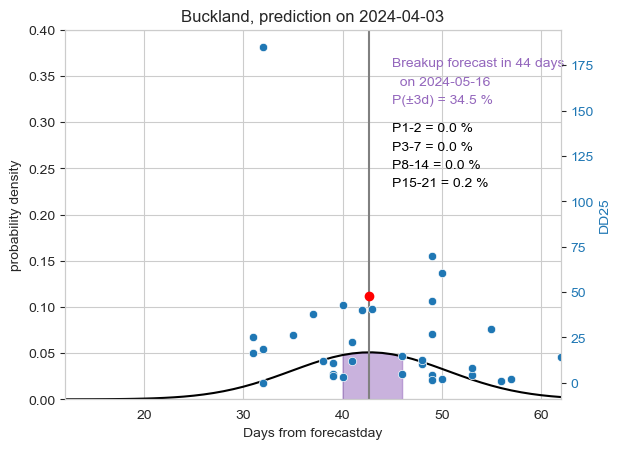

41.693805667471224 42.0 7.830047348491257 1.0498906410913091e-07 3.293861141094734e-06 0.00015374872746423462 0.0032215313228181747


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_70568/2376272638.py:62: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


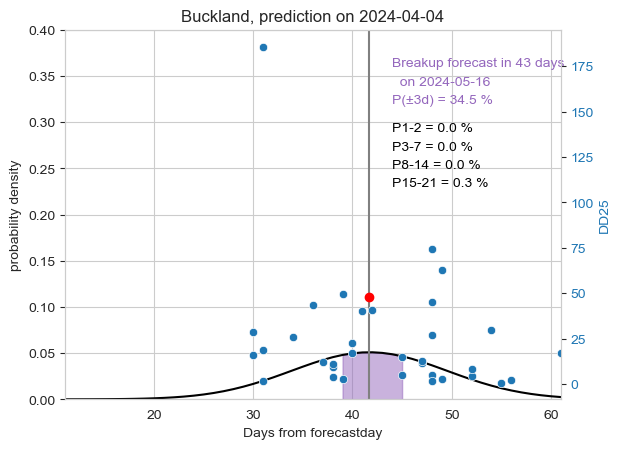

40.738686367117126 41.0 7.817221130520778 1.8947765475892756e-07 5.6013791689626446e-06 0.0002385429472004633 0.004543904419736891


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_70568/2376272638.py:62: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


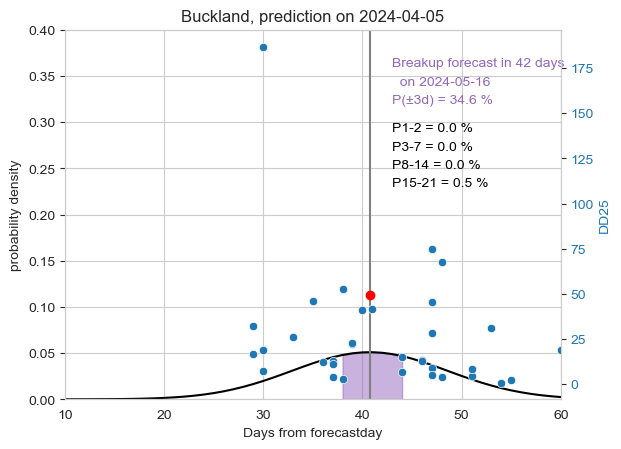

In [ ]:
xs = np.arange(-101, 101)
year = 2024
for_ffmpeg = False

icount = 1
for ii in range (32, 80, 1):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    DDval = mean_station[f'{year}'][ii].squeeze()
    breakup_avg_model.fit(DF[['mean_DD']].values, DF[['days_from_then']].values)
    try: 
        mu_0 = breakup_avg_model.predict([[DDval]]).item()
    except ValueError:
        break
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[dd]]).item() for dd in DF['mean_DD'].tolist()],
                   DF['days_from_then'].tolist(), squared=False)

    # normalize on > 0 values
    pdf = stats.norm.pdf(xs, mu_0, sigma_0)/stats.norm.pdf(xs[101:], mu_0, sigma_0).sum()
    prob_12 = pdf[101:103].sum()
    prob_37 = pdf[103:108].sum()
    prob_wk2 = pdf[108:115].sum()
    prob_wk3 = pdf[115:122].sum()
    # breakup_2022 = DF[DF.year==str(year)]['days_from_then'].squeeze()
    forecastdate = ru.dayssince2date(ii, year)
    print(mu_0, np.round(mu_0), sigma_0, prob_12, prob_37, prob_wk2, prob_wk3)
    fig, ax1 = plt.subplots()
    ax1.plot(xs[:102], pdf[:102], linestyle='dashed', color='grey', linewidth=1)
    ax1.plot(xs[101:], pdf[101:], color='black')
    ax1.vlines(0, 0, 0.4, colors='black', linestyles='dotted')
    # Add most likely +/- 3 days
    mostlikely = int(np.round(mu_0) + 1)
    ax1.vlines(mu_0, 0, 0.4, colors='grey')
    startidx = max(101, 100 + mostlikely-3)
    endidx = startidx + 6
    shiftflag = False   # do we have to shift the +/- 3 day window?
    if  100 + mostlikely-3 < 101:
        shiftflag = True
    plusminus3daysprob = pdf[startidx:endidx+1].sum()
    ax1.fill_between(xs[startidx:endidx+1], pdf[startidx:endidx+1], color='tab:purple', alpha=0.5)
    ax1.text(78-ii, .36, f"Breakup forecast in {mostlikely} days", color='tab:purple')
    ax1.text(78-ii, .34, f"  on {ru.dayssince2date(mostlikely+ii-1, year)}", color='tab:purple')
    if shiftflag: 
        textsnippet = "7d"
    else:
        textsnippet = "±3d"
    ax1.text(78-ii, .32, f"P({textsnippet}) = {plusminus3daysprob*100:.1f} %", color='tab:purple')
    ax1.text(78-ii, .29, f"P1-2 = {prob_12*100:.1f} %", color='black')
    ax1.text(78-ii, .27, f"P3-7 = {prob_37*100:.1f} %", color='black')
    ax1.text(78-ii, .25, f"P8-14 = {prob_wk2*100:.1f} %", color='black')
    ax1.text(78-ii, .23, f"P15-21 = {prob_wk3*100:.1f} %", color='black')
    ax1.set_ylim((0, 0.40))
    ax1.set_ylabel('probability density')
    ax1.set_xlabel("Days from forecastday")
    ax2 = ax1.twinx()
    color = 'tab:blue'
    sns.scatterplot(data=DF, x='days_from_then', y='mean_DD', ax=ax2)
    ax2.scatter(x=[mu_0], y=[mean_station.iloc[ii-1][f"{year}"]], c='r')
    # sns.scatterplot(data=mean_station.reset_index()[mean_station.reset_index()['d_since_march1']==ii-1], x='days_from_then', y='mean_DD', ax=ax2, color='red')
    ax2.set_ylabel('DD25', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(b=None)
    plt.title(f"{location_short}, prediction on {forecastdate}")
    plt.xlim((45-ii, 95-ii))

    plt.show()
    loc = location_short.upper().replace(' ', '_')
    if not for_ffmpeg:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{forecastdate}.png", bbox_inches='tight')
    else:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{icount:02d}.png", bbox_inches='tight')
        icount += 1 

28.321665374204592 28.0 5.436917619693787 32 3.350087588180915e-07 2.880058398559998e-05 0.003137896404657125 0.07167415520560484


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


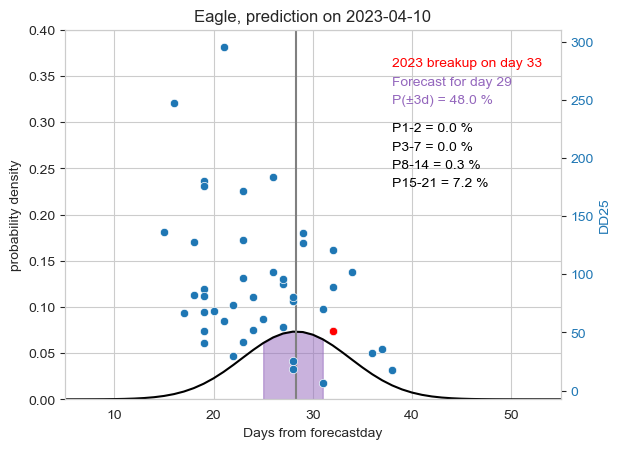

27.530144605628195 28.0 5.379234510540763 31 5.397451029552184e-07 4.4548329803745885e-05 0.004456004381922073 0.09080141490450358


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


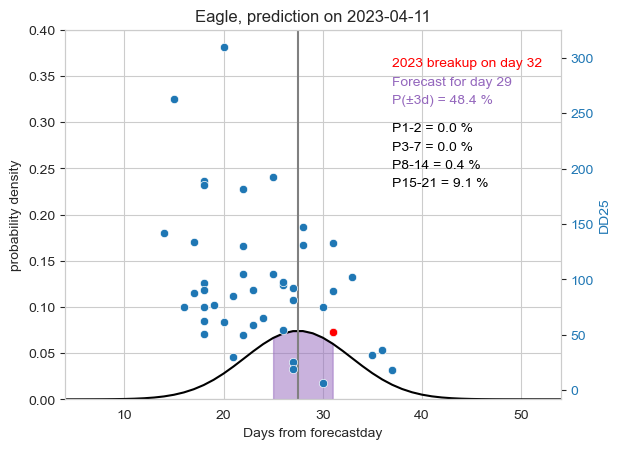

26.64154861792883 27.0 5.309751149335495 30 9.04906972386613e-07 7.160781018883508e-05 0.0065214347636195005 0.11676271219839618


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


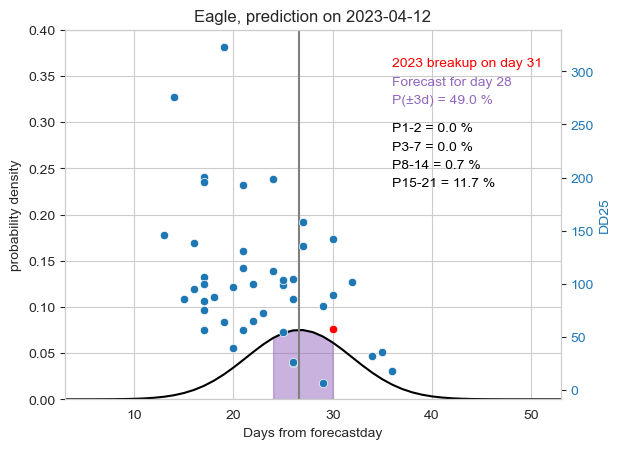

25.855127626373505 26.0 5.222886708501072 29 1.2875460435816419e-06 0.00010151961234836627 0.00881044762681572 0.14332265325853144


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


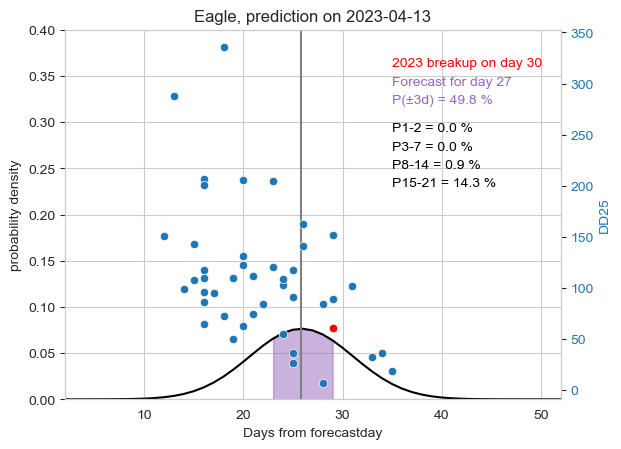

25.02651935744748 25.0 5.136845464347057 28 1.9238512421977317e-06 0.00014950885250078504 0.012154211345943987 0.17642508603120166


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


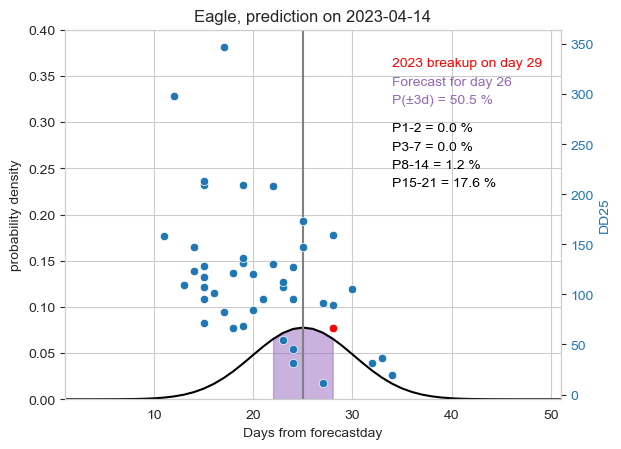

24.14064179027981 24.0 5.076752394184153 27 3.386155321023295e-06 0.00024636112609306617 0.017642729141829818 0.2183983868267207


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


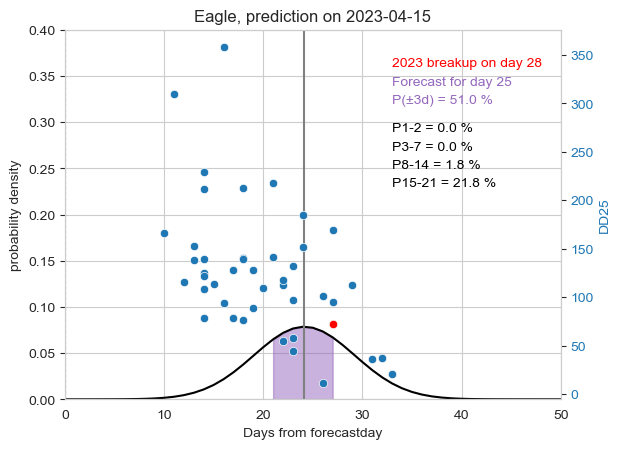

23.28274141662067 23.0 4.992468275012067 26 5.28755489323899e-06 0.0003734358691225019 0.02445608556040222 0.2634765039305108


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


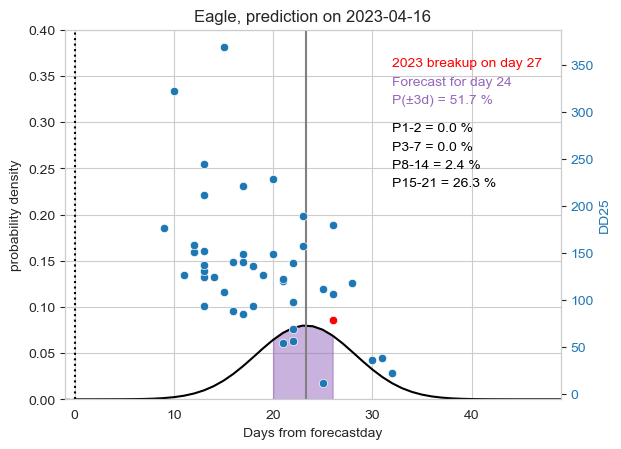

22.32321205090131 22.0 4.934391623170759 25 1.002975345438246e-05 0.0006467665594151993 0.0359742420931477 0.3190123657206009


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


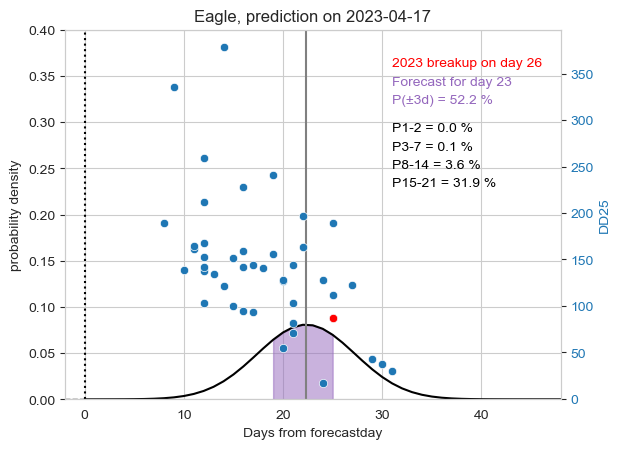

21.476921583283005 21.0 4.8865884774936 24 1.7772273040122757e-05 0.0010483022190351807 0.049927281212229446 0.3696398017100893


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


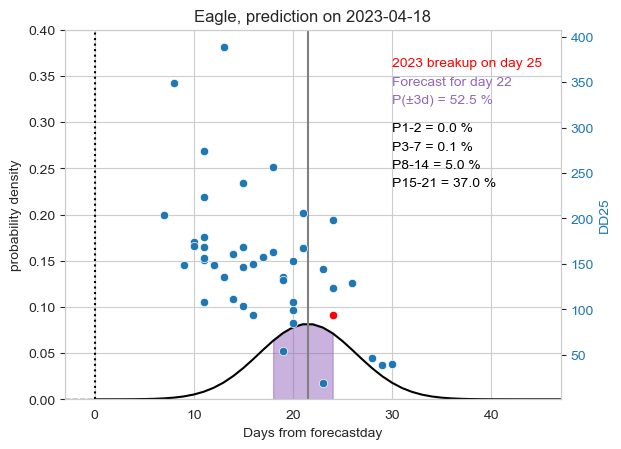

20.692113806392527 21.0 4.817267555890818 23 2.7636128086225157e-05 0.001548894044370332 0.06578779243177779 0.4166986233316661


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


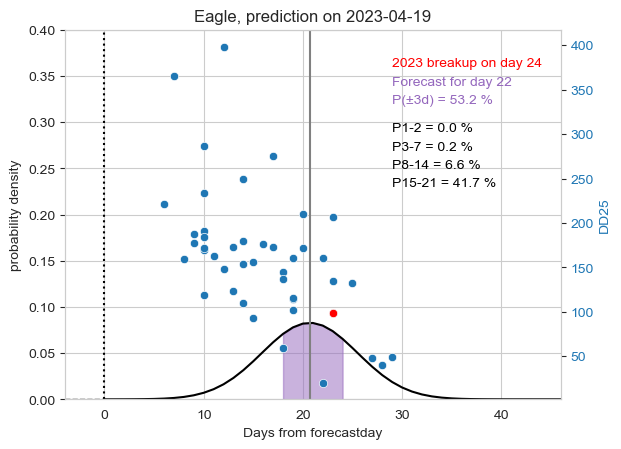

19.900034284442327 20.0 4.759859852399431 22 4.501852353703945e-05 0.0023444200974508953 0.08658215312423247 0.4612691699772307


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


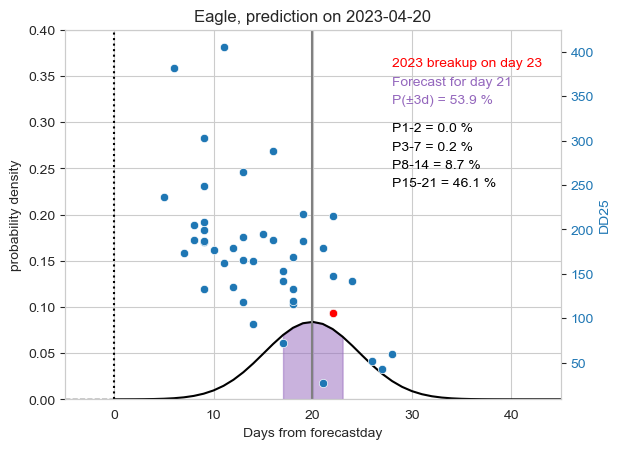

18.927842084444883 19.0 4.721021402708702 21 8.975826944574075e-05 0.004069123692753613 0.12051106314384902 0.5059964828417888


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


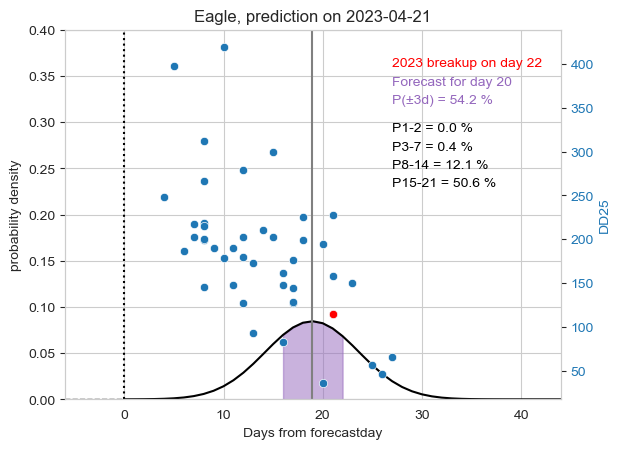

18.040544701926464 18.0 4.642216938474811 20 0.00014706991660516468 0.006194228755137076 0.15717631549612648 0.5387048337046022


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


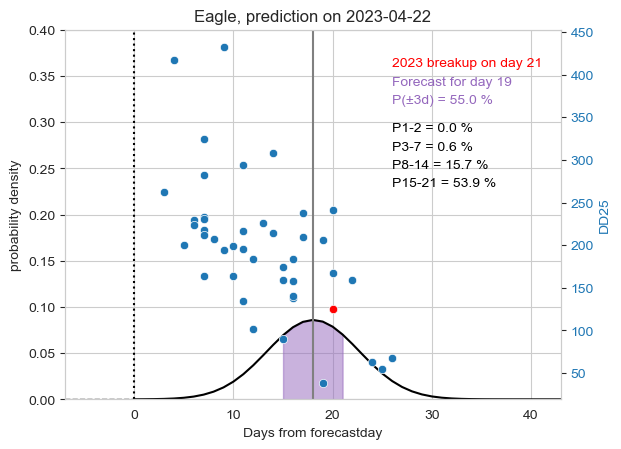

17.470158634533426 17.0 4.532150973364385 19 0.0001716110325228496 0.007438135312638627 0.18239231827587102 0.558522951062171


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


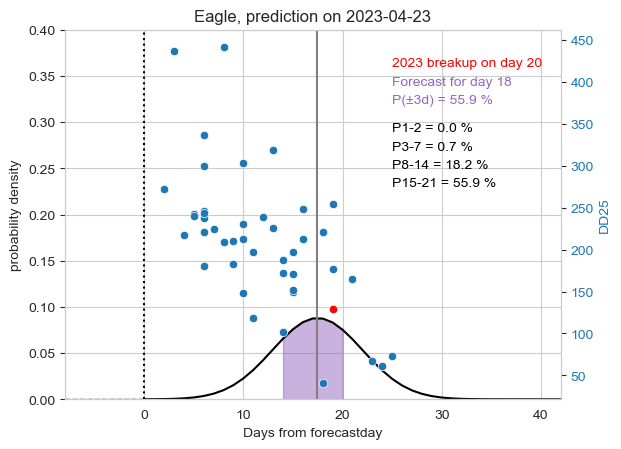

16.968946027047675 17.0 4.429270940907795 18 0.00019407330330900122 0.008695048802607457 0.20734923278691342 0.5715818835939631


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


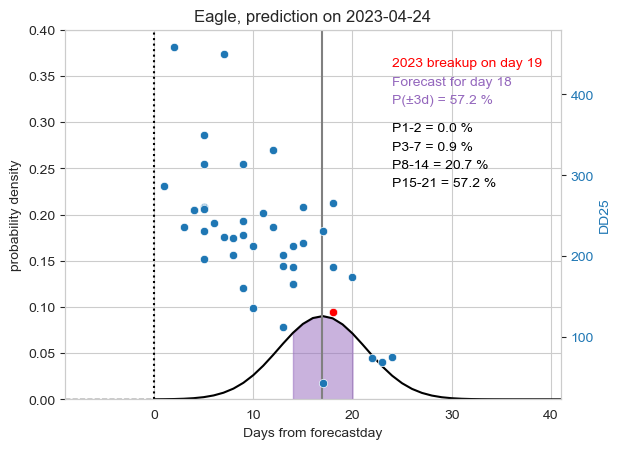

16.33885449872961 16.0 4.314841837283853 17 0.00023782290905277246 0.01086292167035114 0.24368228721988552 0.578324082487344


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


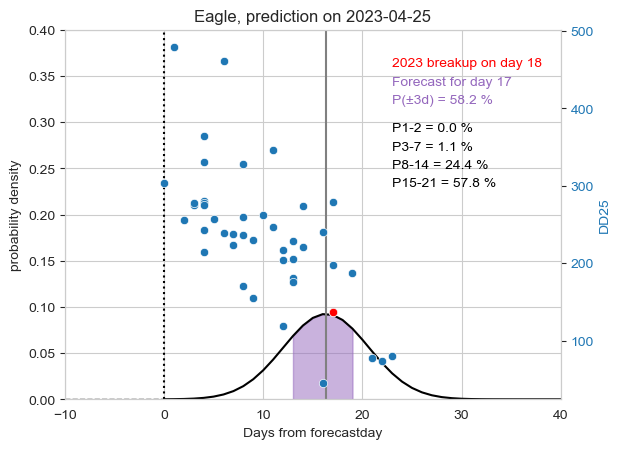

15.662842901407657 16.0 4.188669069293369 16 0.00029553272684988403 0.013813401688749522 0.2882256728168891 0.574139672931109


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


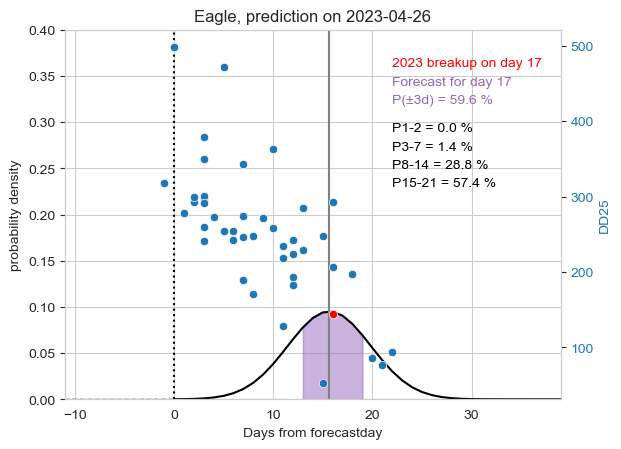

14.853463867189372 15.0 4.0771356250436455 15 0.00043287212652374645 0.019476238687706635 0.34968279518192136 0.5478959326717724


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


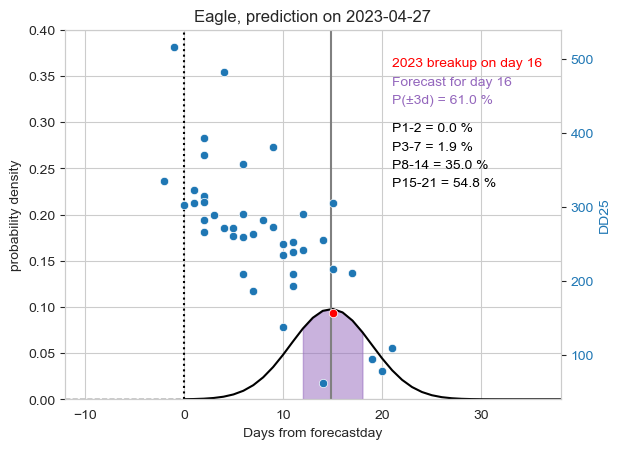

13.930696741183908 14.0 3.99258740441774 14 0.0007543617034546697 0.030125254524945487 0.4259768789052098 0.49363347323042134


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


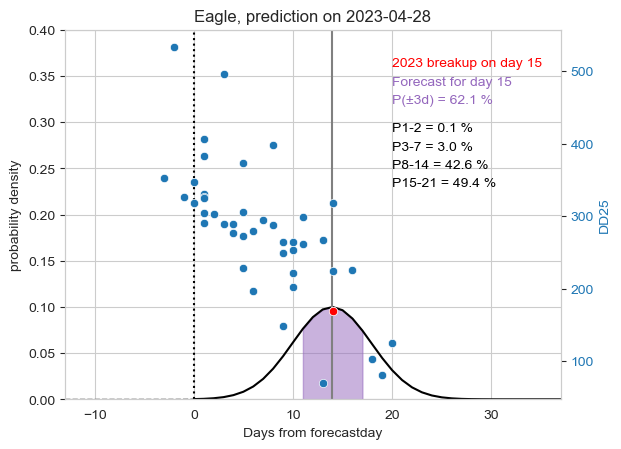

13.093318213882164 13.0 3.922835944475899 13 0.0012660190558915086 0.04445297960399697 0.4955601774511988 0.4295493918869134


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


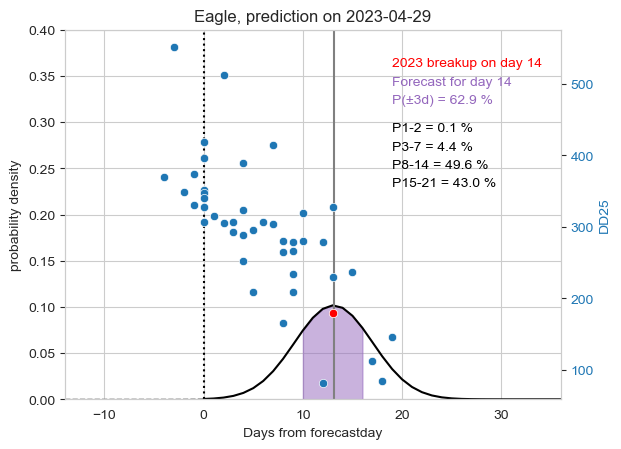

12.080165758639673 12.0 3.85191125004238 12 0.002412673625342263 0.07024253148722168 0.5713337854115673 0.3418153101016032


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


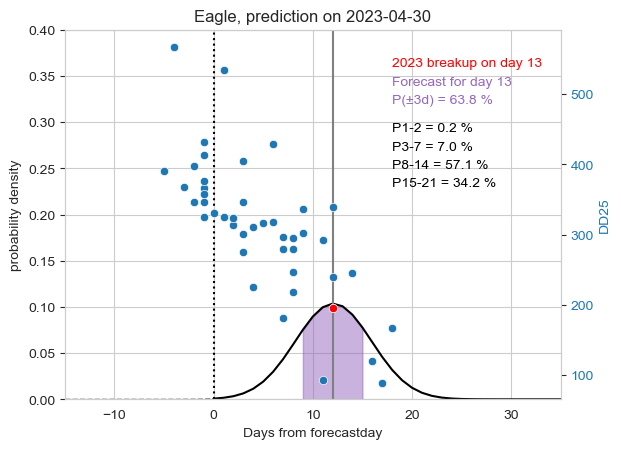

11.01707883662477 11.0 3.800730833355081 11 0.00483398636337001 0.11076210910978385 0.6279203259950984 0.25030573179094706


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


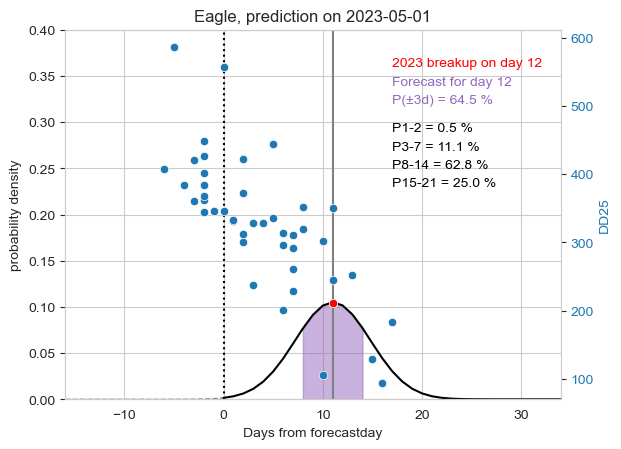

9.988387395238945 10.0 3.709519827651387 10 0.008595703955057345 0.16228648062005402 0.6575508975693494 0.16932217152272822


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


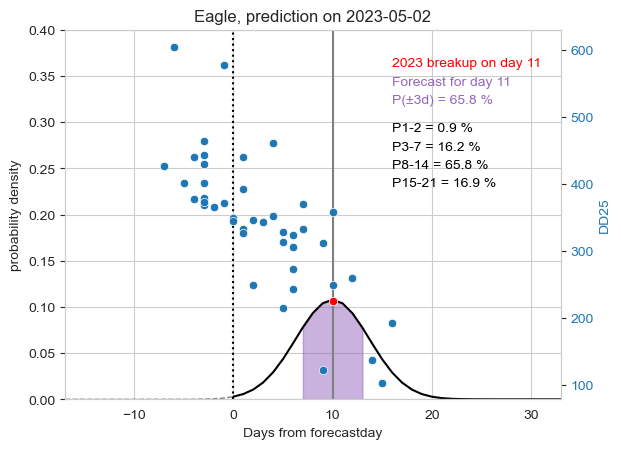

9.234389294656175 9.0 3.617860341845583 9 0.012558411335182616 0.20889452116216178 0.6596933321722711 0.11795797780770965


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


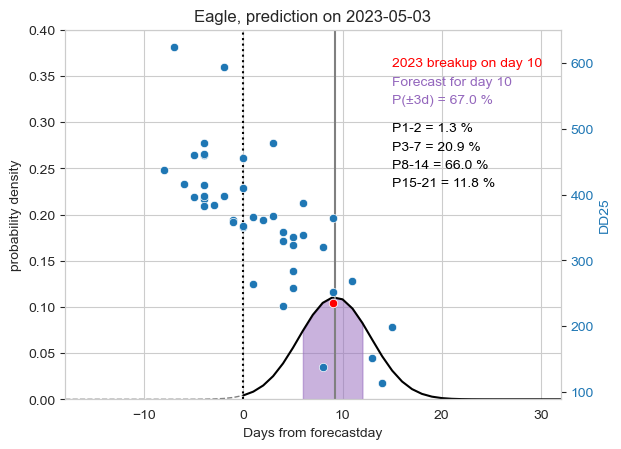

8.388791121085593 8.0 3.5452183467187623 8 0.019788390770790157 0.27248724768601174 0.6332670216948844 0.07415096440559114


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


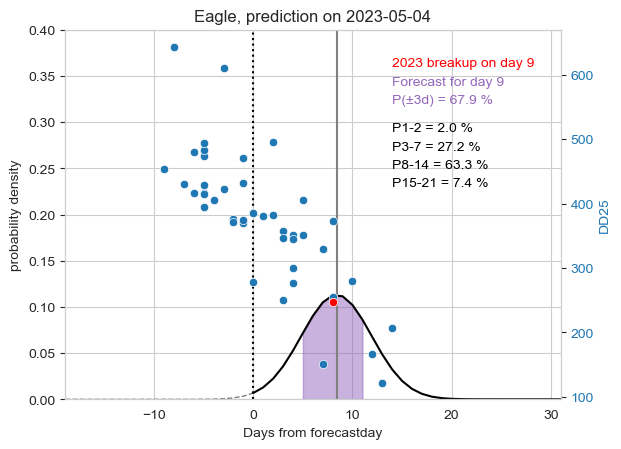

7.509648427089584 8.0 3.4822901583599144 7 0.03149253849437241 0.3475362658654106 0.5783659231209971 0.04251345967989469


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


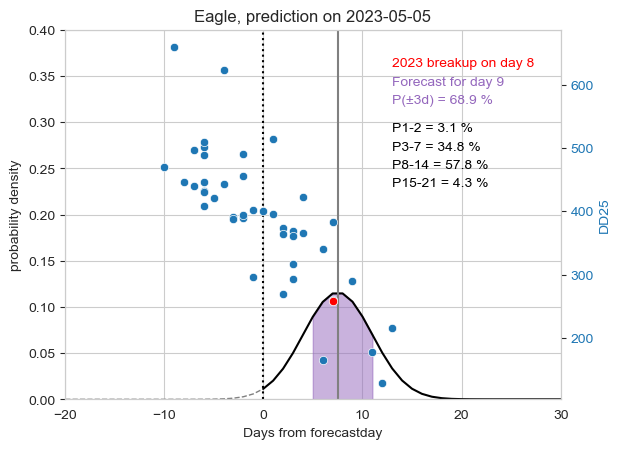

6.535173250833946 7.0 3.457344458487301 6 0.05244441118872501 0.43289250314989314 0.4925978993676844 0.02203939452276206


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


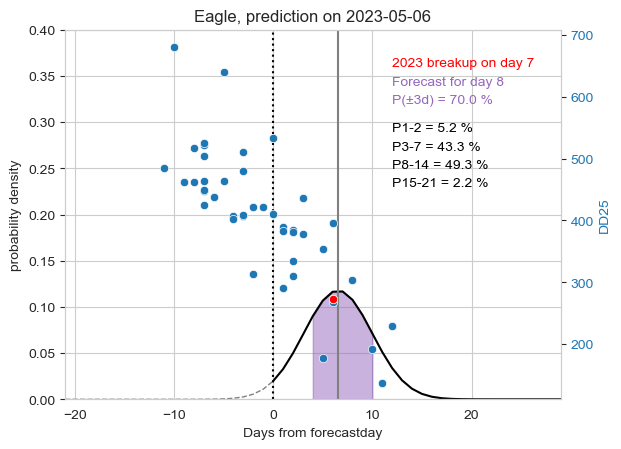

5.602823265443069 6.0 3.447864488799955 5 0.0814457623706879 0.5059434593783837 0.4014209678976435 0.011182261566157448


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


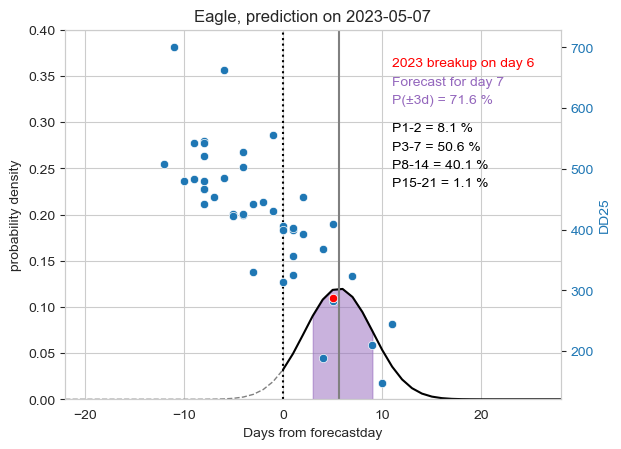

4.606144326975242 5.0 3.462739479625729 4 0.12310003007368617 0.5635750938225991 0.30797585854352827 0.0053468097445662525


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


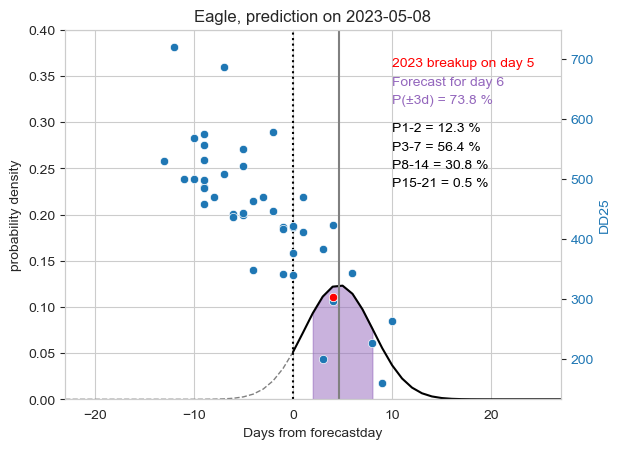

3.6239632325558677 4.0 3.4502797581198097 3 0.1731329890139156 0.5992113894711402 0.22535381690497483 0.0023012851204249


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


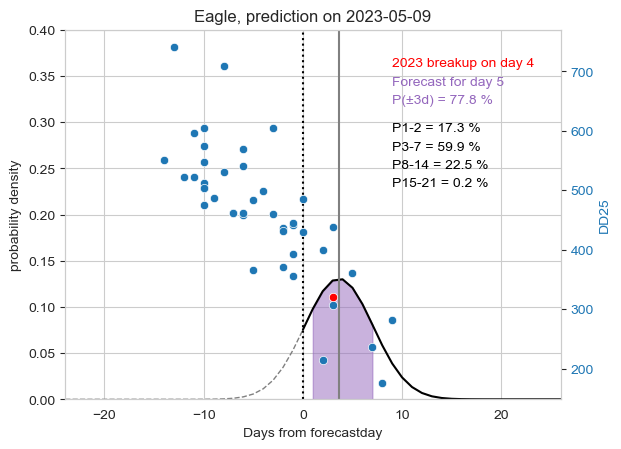

2.575151578402446 3.0 3.432931770087366 2 0.2357717126895434 0.6102239684736213 0.1531430539234089 0.0008611663115250258


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


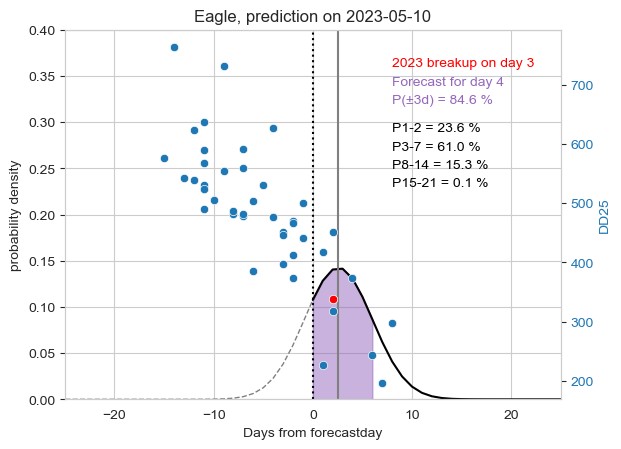

1.436395947038804 1.0 3.4332390765885794 1 0.3104075532739906 0.5924071933119688 0.09689013346265384 0.0002951023245950942


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


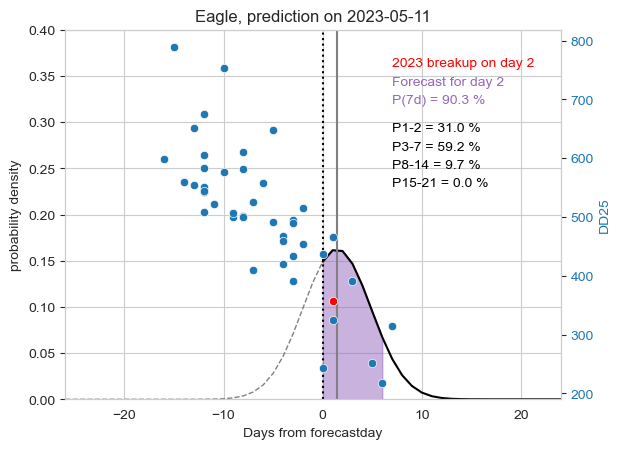

0.23239464334972304 0.0 3.4471493325888902 0 0.39075557149334356 0.551015487105418 0.0581328488141703 9.608947337435995e-05


/var/folders/jh/dmrl1jcn7ql6ftcyq7l6p8v80000gn/T/ipykernel_13335/2825800676.py:60: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


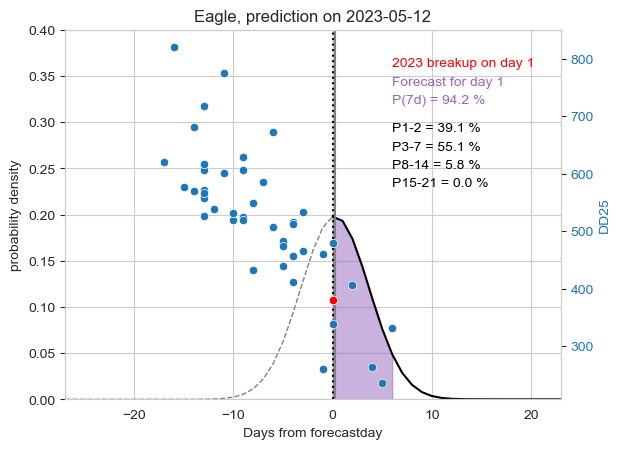

In [ ]:
# fudged version

xs = np.arange(-101, 101)
year = 2024
for_ffmpeg = True

icount = 1
for ii in range (40, 80, 1):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    DDval = DF[DF['year']==str(year)]['mean_DD'].squeeze()
    breakup_avg_model.fit(DF[['mean_DD']].values, DF[['days_from_then']].values)
    mu_0 = breakup_avg_model.predict([[DDval]]).item() + 2
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[dd]]).item() for dd in DF['mean_DD'].tolist()],
                   DF['days_from_then'].tolist(), squared=False)

    # normalize on > 0 values
    pdf = stats.norm.pdf(xs, mu_0, sigma_0)/stats.norm.pdf(xs[101:], mu_0, sigma_0).sum()
    prob_12 = pdf[101:103].sum()
    prob_37 = pdf[103:108].sum()
    prob_wk2 = pdf[108:115].sum()
    prob_wk3 = pdf[115:122].sum()
    breakup_2022 = DF[DF.year==str(year)]['days_from_then'].squeeze()
    forecastdate = ru.dayssince2date(ii, year)
    print(mu_0, np.round(mu_0), sigma_0, breakup_2022, prob_12, prob_37, prob_wk2, prob_wk3)
    fig, ax1 = plt.subplots()
    ax1.plot(xs[:102], pdf[:102], linestyle='dashed', color='grey', linewidth=1)
    ax1.plot(xs[101:], pdf[101:], color='black')
    ax1.vlines(0, 0, 0.4, colors='black', linestyles='dotted')
    # Add most likely +/- 3 days
    mostlikely = int(np.round(mu_0) + 1)
    ax1.vlines(mu_0, 0, 0.4, colors='grey')
    startidx = max(101, 100 + mostlikely-3)
    endidx = startidx + 6
    shiftflag = False   # do we have to shift the +/- 3 day window?
    if  100 + mostlikely-3 < 101:
        shiftflag = True
    plusminus3daysprob = pdf[startidx:endidx+1].sum()
    ax1.fill_between(xs[startidx:endidx+1], pdf[startidx:endidx+1], color='tab:purple', alpha=0.5)
    ax1.text(78-ii, .36, f"{year} breakup on day {breakup_2022+1}", color='red')
    ax1.text(78-ii, .34, f"Forecast for day {mostlikely}", color='tab:purple')
    if shiftflag: 
        textsnippet = "7d"
    else:
        textsnippet = "±3d"
    ax1.text(78-ii, .32, f"P({textsnippet}) = {plusminus3daysprob*100:.1f} %", color='tab:purple')
    ax1.text(78-ii, .29, f"P1-2 = {prob_12*100:.1f} %", color='black')
    ax1.text(78-ii, .27, f"P3-7 = {prob_37*100:.1f} %", color='black')
    ax1.text(78-ii, .25, f"P8-14 = {prob_wk2*100:.1f} %", color='black')
    ax1.text(78-ii, .23, f"P15-21 = {prob_wk3*100:.1f} %", color='black')
    ax1.set_ylim((0, 0.40))
    ax1.set_ylabel('probability density')
    ax1.set_xlabel("Days from forecastday")
    ax2 = ax1.twinx()
    color = 'tab:blue'
    sns.scatterplot(data=DF, x='days_from_then', y='mean_DD', ax=ax2)
    # sns.scatterplot(data=DF[DF.year==str(year)], x='days_from_then', y='mean_DD', ax=ax2, color='red')
    ax2.set_ylabel('DD25', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(b=None)
    plt.title(f"{location_short}, prediction on {forecastdate}")
    plt.xlim((45-ii, 95-ii))

    plt.show()
    loc = location_short.upper().replace(' ', '_')
    if not for_ffmpeg:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{forecastdate}_withprior.png", bbox_inches='tight')
    else:
        fig.savefig(outfolder / f"{loc}_DD25_{year}_{icount:02d}_withprior.png", bbox_inches='tight')
        icount += 1 
    if breakup_2022 == 0: break

In [ ]:
outfolder.exists()

False

In [ ]:
stats.norm.pdf(xs, mu_0, sigma_0).sum()

0.41550719987373425

5.78129607869729


/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

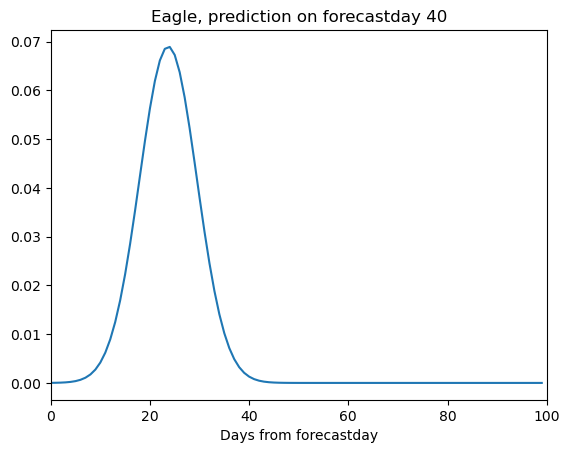

5.78129607869729


/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

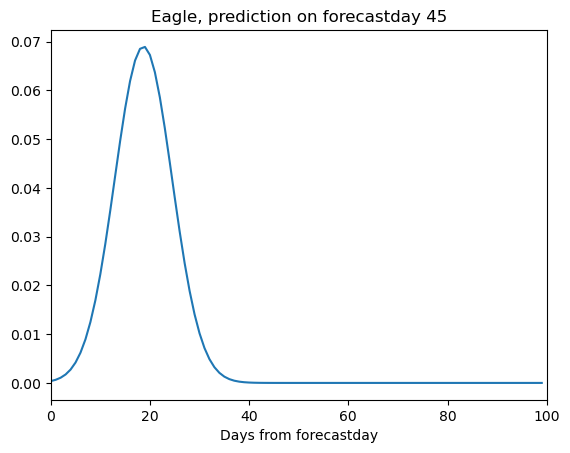

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


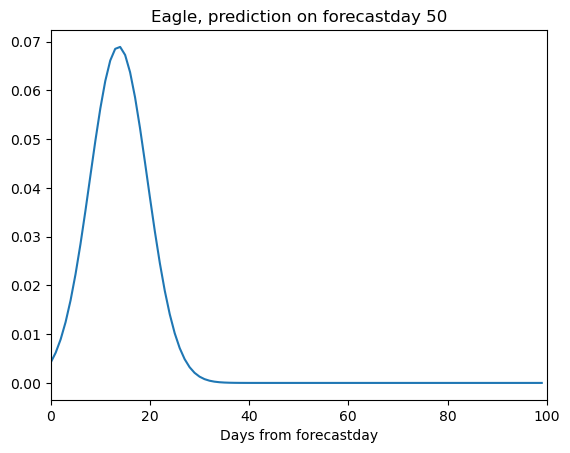

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


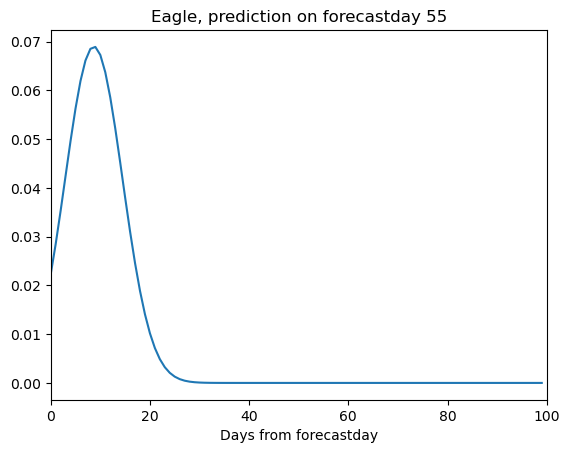

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


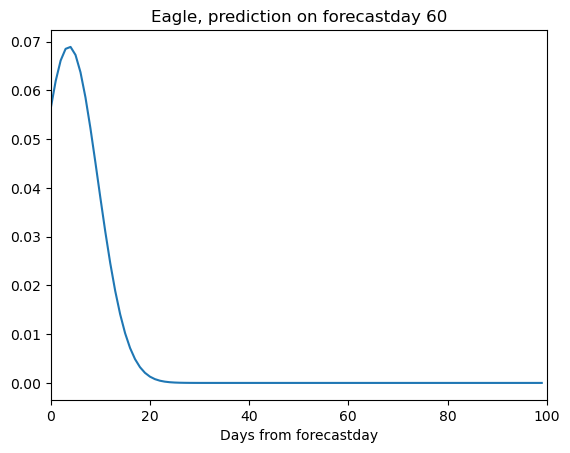

In [ ]:
for ii in range (40, 65, 5):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    breakup_avg_model.fit(DF[['year']], DF[['days_from_then']])
    mu_0 = breakup_avg_model.predict([[2023]]).item()
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[yr]]).item() for yr in DF['year'].astype(int).tolist()],
                   DF['days_from_then'].tolist(), squared=False)
    print(sigma_0)
    plt.plot(xs, stats.norm.pdf(xs, mu_0, sigma_0))
    plt.title(f"Eagle, prediction on forecastday {ii}")
    plt.xlabel("Days from forecastday")
    plt.xlim((0, 100))
    plt.show()

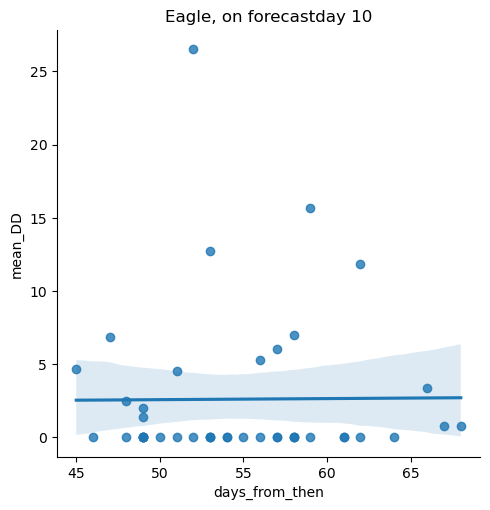

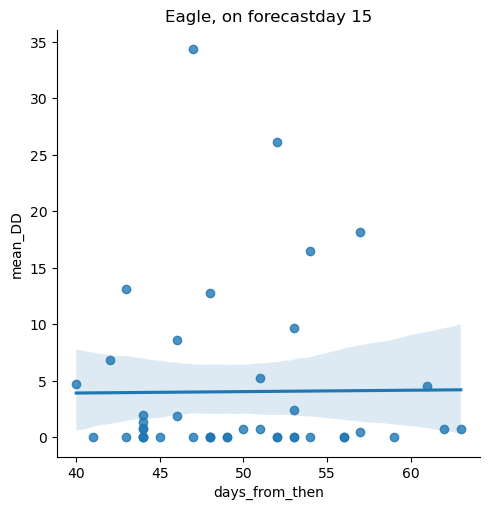

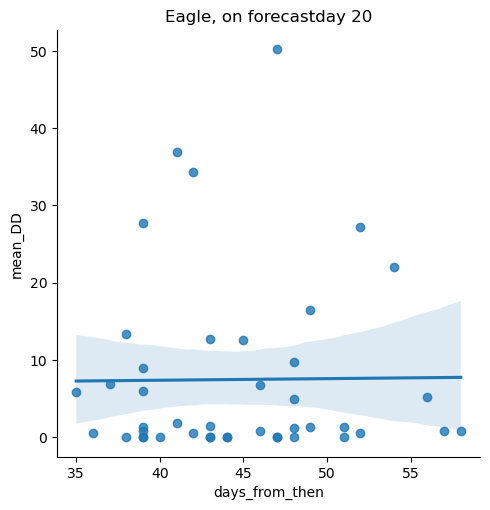

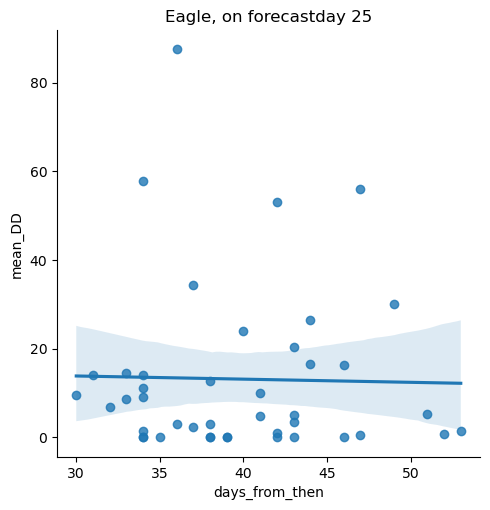

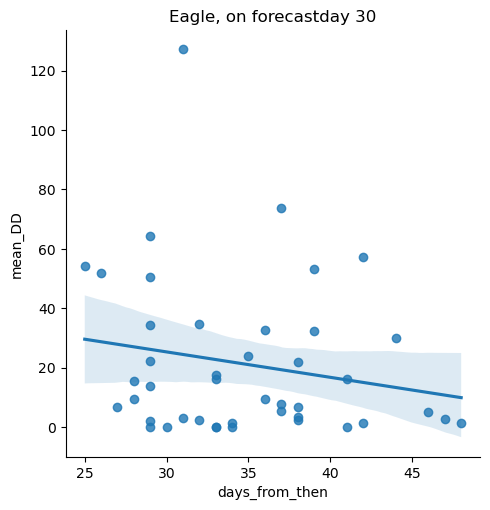

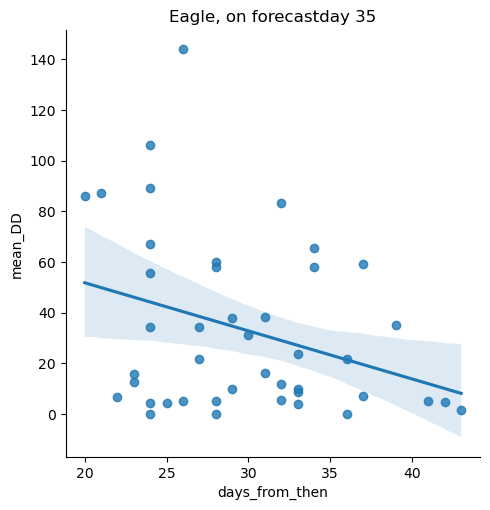

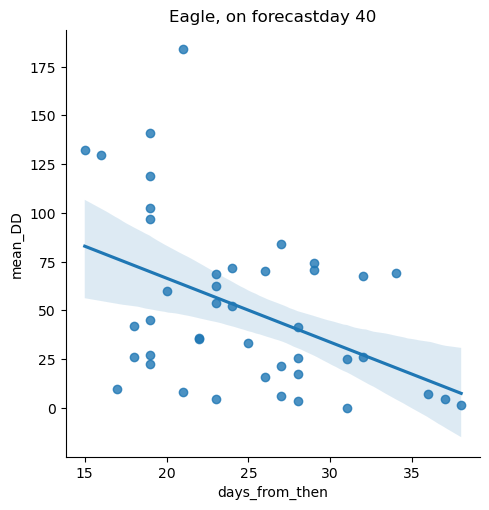

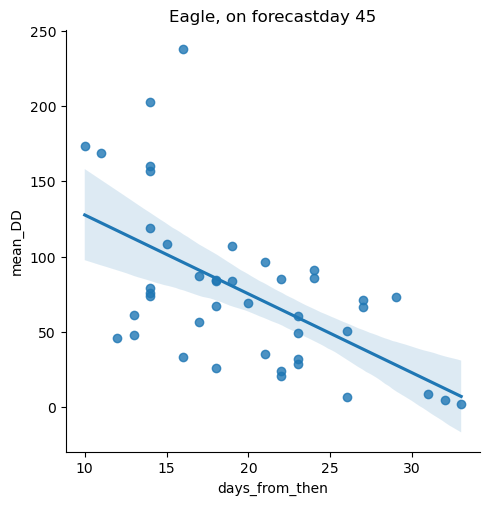

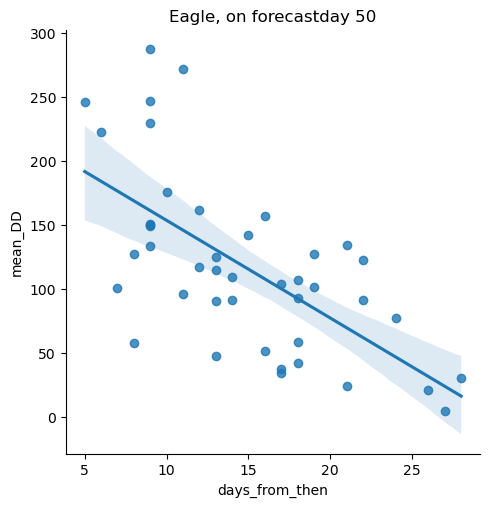

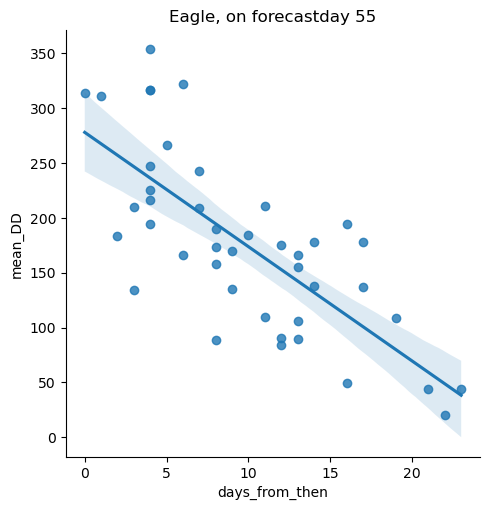

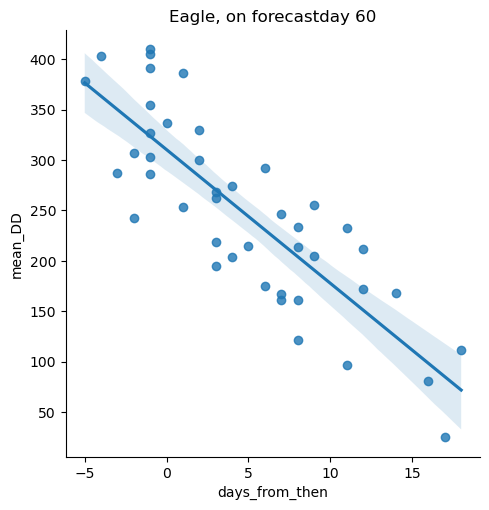

In [ ]:
# pivoted = likelihoodDF.pivot(index='forecast_day_past_march1', columns='days_from_then', values='mean_DD')
for ii in range (10, 65, 5):
    sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1==ii], x='days_from_then', y='mean_DD')
    plt.title(f"Eagle, on forecastday {ii}")

Text(41.31482827771349, 0.5, 'Breakup in ... days')

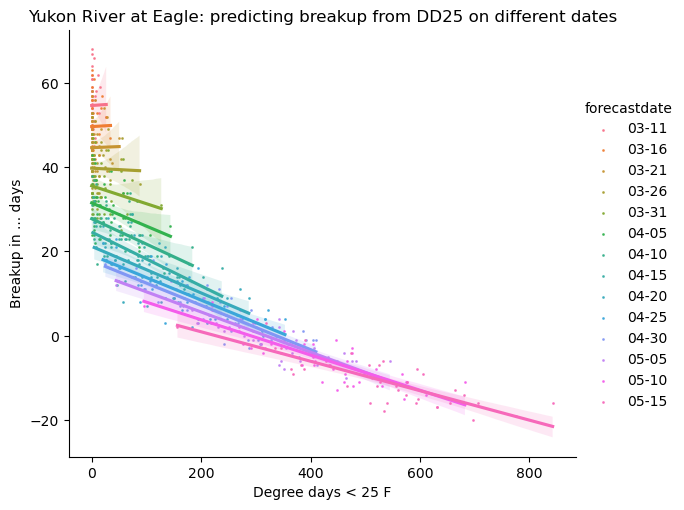

In [ ]:
sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1 % 5 == 0], 
           hue='forecastdate', y='days_from_then', x='mean_DD', 
           scatter=True, scatter_kws={"s": 1},
           aspect=1.2,
           )
plt.title(f"Yukon River at Eagle: predicting breakup from {prefix} on different dates")
plt.xlabel('Degree days < 25 F')
plt.ylabel("Breakup in ... days")

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days in possible_days:
    days_possible = days + days_after_march_1
    years = breakup[breakup['days_since_march1']==days].year.astype(str).to_list()
    if years != []:
        records.append(
            {'days_after_march_1': days_after_march_1,
                'days_from_then': days,
                'mean_DD': mean_eagle[years].mean(axis=1)[days_after_march_1]}
        )

In [ ]:
mean_eagle[['2014', '2019']].mean(axis=1)[0]

0.0

<AxesSubplot: xlabel='d_since_march1'>

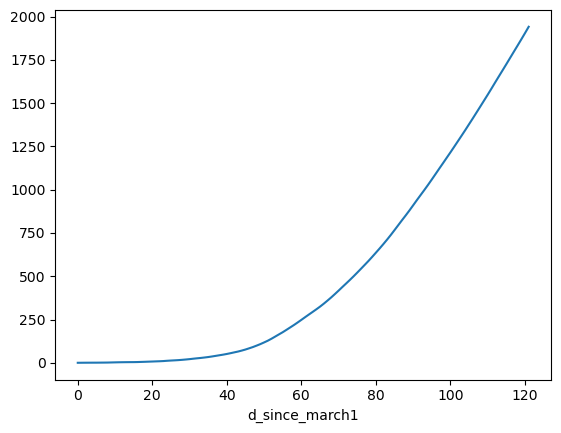

In [ ]:
mean_eagle.mean(axis=1).plot()

<AxesSubplot: xlabel='d_since_march1'>

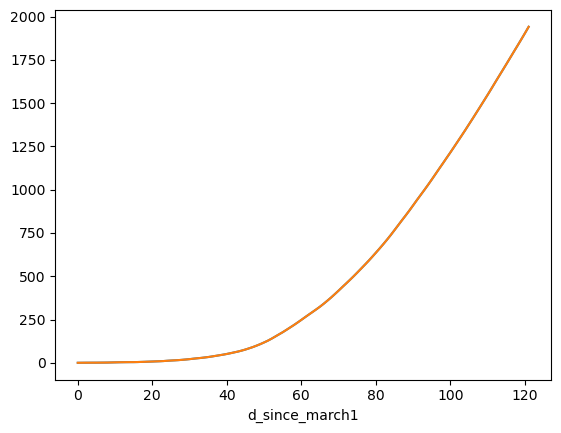

In [ ]:
mean_eagle1 = pd.concat(stationsdfs.values())
mean_eagle1 = mean_eagle1.groupby(mean_eagle1.index).mean()
ax = mean_eagle1.mean(axis=1).plot()
mean_eagle.mean(axis=1).plot(ax=ax)

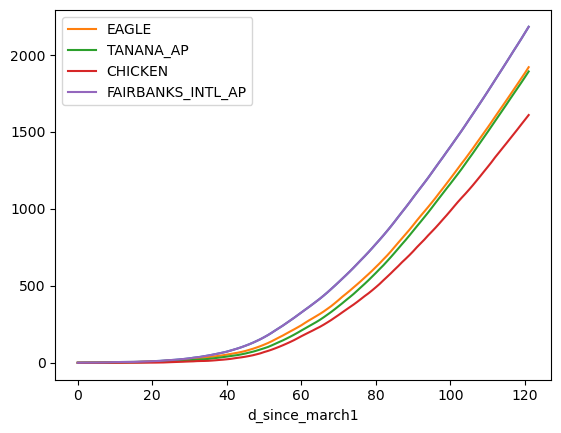

In [ ]:
ax = stationsdfs['FAIRBANKS_INTL_AP'].mean(axis=1).plot()
for key in stationsdfs.keys():
    stationsdfs[key].mean(axis=1).plot(ax=ax, label=key)
plt.legend()

In [ ]:
# outrecords = {"date1": [{'data1': 'record1', 'data2': 'record2', 'data3': 'record3'[{, 
#                         "date2": [{'data1': 'record21', 'record22', 'record23']}}

df = pd.DataFrame.from_records([{'data1': 'record1', 'data2': 'record2', 'data3': 'record3'}], )

df

,data1,data2,data3
0,record1,record2,record3


## Make a combined dataset for stationdata

In [ ]:
sites = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AIRPORT', 'NENANA_MUN_AP']

In [ ]:
stationsdfs = {}
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
for station in sites2:
    stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)